# Packages

In [2]:
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from rpy2.robjects import r, pandas2ri


In [3]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

In [50]:
import geometric_sampling as gs
from geometric_sampling.search.astar import AStar
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT



# R Different Populations

In [ ]:
%%R
install.packages("sampling")

In [13]:
ro.r('library(sampling)')
ro.r('n_percent = .05')


sampling = importr('sampling')
ro.r('library(sampling)')


ro.r('x1 = swiss$Education')
ro.r('y1 = swiss$Examination')




#ro.r('rand_seed = sample(length(x1))')
#ro.r('x1 = x1[rand_seed]')
#ro.r('y1 = y1[rand_seed]')

x1 = np.array(ro.r('x1'))
y1 = np.array(ro.r('y1'))

ro.r('N1 = length(x1)')
N1 = ro.r('N1')
ro.r('n1 = round(n_percent * N1)')
n1 = ro.r('n1')
ro.r('inclusions1 = inclusionprobabilities(x1, n1)')

inclusions1 = ro.r("inclusions1")

inclusions1[inclusions1 == 0] = 1e-4
print(np.corrcoef(x1, y1)[0,1])





# SWISS
#https://search.r-project.org/CRAN/refmans/sampling/html/swissmunicipalities.html
ro.r('data(swissmunicipalities)')
ro.r('y2 = swissmunicipalities$Airbat')
ro.r('x2 = swissmunicipalities$Pop020')
ro.r('v2 = swissmunicipalities$Airind')
ro.r('h2 = swissmunicipalities$H00P01')
ro.r('w2 = swissmunicipalities$H00P04')


x2 = np.array(ro.r('x2'))
y2 = np.array(ro.r('y2'))
v2 = np.array(ro.r('v2'))
w2 = np.array(ro.r('w2'))
h2 = np.array(ro.r('h2'))

ro.r('N2 = length(x2)')
N2 = ro.r('N2')
ro.r('n2 = round(n_percent * N2)')
n2 = ro.r('n2')
ro.r('inclusions2 = inclusionprobabilities(x2, n2)')
inclusions2 = ro.r("inclusions2")

inclusions2[inclusions2 == 0] = 1e-4
print(np.corrcoef(x2, y2)[0,1])






#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')


x3 = np.array(ro.r('x3'))
y3 = np.array(ro.r('y3'))
v3 = np.array(ro.r('v3'))
w3 = np.array(ro.r('w3'))
h3 = np.array(ro.r('h3'))

ro.r('N3 = length(x3)')
N3 = ro.r('N3')
ro.r('n3 = round(n_percent * N3)')
n3 = ro.r('n3')
#ro.r('inclusions3 = inclusionprobabilities(x3 + runif(N3, -1,1), n3)')
ro.r('inclusions3 = inclusionprobabilities(x3, n3)')

inclusions3 = ro.r("inclusions3")
inclusions3[inclusions3 == 0] = 1e-4
ro.r('print(cor(x3,y3))')






#simu
ro.r('x4 = rnorm(100, 200, 5)')
ro.r('y4 = x4 + runif(100, -5, 5)')
ro.r('z4 = x4 + runif(100, -5, 5)')

ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x4))')
ro.r('x4 = x4[rand_seed]')
ro.r('y4 = y4[rand_seed]')
ro.r('z4 = z4[rand_seed]')

x4 = np.array(ro.r('x4'))
y4 = np.array(ro.r('y4'))
z4 = np.array(ro.r('z4'))

ro.r('N4 = length(x4)')
N4 = ro.r('N4')
ro.r('n4 = round(n_percent * N4)')
n4 = ro.r('n4')
ro.r('inclusions4 = inclusionprobabilities(x4, n4)')
inclusions4 = ro.r("inclusions4")
inclusions4[inclusions4 == 0] = 1e-4





#MU284 Sweden
ro.r('data(MU284)')
ro.r('y5 = MU284$RMT85')
ro.r('x5 = MU284$P85')
ro.r('g5 = MU284$P75')
ro.r('v5 = MU284$S82')
ro.r('h5 = MU284$ME84')
ro.r('w5 = MU284$REV84')



y5 = np.array(ro.r('y5'))
x5 = np.array(ro.r('x5'))
g5 = np.array(ro.r('g5'))
v5 = np.array(ro.r('v5'))
h5 = np.array(ro.r('h5'))
w5 = np.array(ro.r('w5'))


ro.r('N5 = length(x5)')
N5 = ro.r('N5')
ro.r('n5 = round(n_percent * N5)')
n5 = ro.r('n5')
ro.r('inclusions5 = inclusionprobabilities(x5, n5)')
inclusions5 = ro.r("inclusions5")
inclusions5[inclusions5 == 0] = 1e-4



#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')



#small simu
ro.r('x6 = c(1,2,3,4,5,6,7,8,9,10)')
ro.r('y6 = c(10,27,30,4,57,60,70,83,80,130)')

x6 = np.array(ro.r('x6'))
y6 = np.array(ro.r('y6'))

ro.r('N6 = length(x6)')
N6 = ro.r('N6')
ro.r('n6 = 3')
n6 = ro.r('n6')
ro.r('inclusions6 = inclusionprobabilities(x6, n6)')
inclusions6 = ro.r("inclusions6")
inclusions6[inclusions6 == 0] = 1e-4



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/local/lib/R/site-library’ contains no packages



0.6984152962884828
0.9421664139113467
[1] 0.9750693


# Simu The best

In [138]:
%%R
####################
### Getting Data ###
####################
library(sampling)
#MU284 Sweden
data(MU284)
MU284 = MU284[MU284$P85<200,]
set.seed(121)
MU284 = MU284[sample(length(MU284[,1])),]
y5 = MU284$RMT85
x5 = MU284$P85/100
g5 = MU284$P75/100
v5 = MU284$S82/1000
h5 = MU284$ME84/1000
w5 = MU284$REV84/1000


RMT85 = MU284$RMT85
P85 = MU284$P85/100
P75 = MU284$P75/100
S82 = MU284$S82/1000
ME84 = MU284$ME84/1000
REV84 = MU284$REV84/1000
REG = MU284$REG


N = length(REV84)
n_percent = .05
n = round(n_percent * N)
n = 10
r <- runif(N, .1, .8)
e <- rep (1, N)

#1 Great
y <- P85; z <- REV84; p <- P75
#y <- P85; z <- ME84; p <- S82
#y <- P85; z <- ME84; p <- REG
#y <- P85; z <- ME84; p <- e
M_0 = 10
y = 5 * runif(M_0)
z = y + runif(M_0)
p = z + runif(M_0)
N = length(y)
n = 4
pik <- inclusionprobabilities(p, n)
pik[pik>1] = 1
pik[pik==0] = 1e-4

print(c(N, n))

##########################
### Variance of Rivals ###
##########################
pikl_sys = UPsystematicpi2(pik)
pikl_max = UPmaxentropypi2(pik)
#pikl_max = pikl_sys
pikl_mid = UPmidzunopi2(pik)
pikl_til = UPtillepi2(pik)

z_hat = z / pik

var__sys <- t(z_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% z_hat
var__max <- t(z_hat) %*% (pikl_max - (pik %*% t(pik))) %*% z_hat
var__mid <- t(z_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% z_hat
var__til <- t(z_hat) %*% (pikl_til - (pik %*% t(pik))) %*% z_hat
var__srs <- (N**2)*(1-n/N)*(1/n)*var(z)

y_hat = y/pik

var__sys_y <- t(y_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% y_hat
var__max_y <- t(y_hat) %*% (pikl_max - (pik %*% t(pik))) %*% y_hat
var__mid_y <- t(y_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% y_hat
var__til_y <- t(y_hat) %*% (pikl_til - (pik %*% t(pik))) %*% y_hat
var__srs_y <- (N**2)*(1-n/N)*(1/n)*var(y)




var_x = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_x) = c('sysxy', 'maxxy', 'midxy', 'tilxy', 'srsxy')
threshold_x = min(var_x[var_x>0])

var_y = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y )
names(var_y) = c('sysy', 'maxy', 'midy', 'tily', 'srsy')
threshold_y = min(var_y[var_y>0])



#################################
############ Plots and Prints ###
#################################
if(1==0){
  par(mfrow=c(2,3))
  plot(y, z)
  plot(p, z)
  plot(p, y)
  
  plot(z_hat, y_hat)
  plot(p/pik, y_hat)
  
  plot(p/pik, z_hat)
  par(mfrow=c(2,3))
#cat('x,y', cor(x,y), '\n x,z', cor(z, x), '\n y,z', cor(z, y), "\n")
plot(y, z)
plot(p,z)
plot(p,y)

plot(z_hat,y_hat)
plot(p/pik,y_hat)

plot(p/pik,z_hat)


  cat("x_NHT, y_NHT", cor(p/pik,y/pik), "x, z", cor(p,z), "z_NHT, y_NHT", cor(z/pik,y/pik))

z_hat = z/pik
print(var_x)
print(var_y)
cat("x threshold", threshold_x, "\n", "y threshold", threshold_y, "\n")


#cat("x_NHT, y_NHT", cor(p/pik,y/pik), "x, z", cor(x,z), "z_NHT, y_NHT", cor(z/pik,y/pik))
Final_result = cbind(y,z, y_hat, z_hat, pik, abs((y_hat- z_hat)/y_hat))

print(c(N,n))

}


[1]

 10  4


In [139]:
%%R
M = 1000
print(M)
print(cor(y, z))
cube_estimatieon = array(0, M)
for(m in 1:M){
    cube_sample = samplecube(cbind(pik,y), pik, comment=FALSE)
    cube_estimatieon[m] = sum(y[cube_sample==1]/pik[cube_sample==1])

}
print(c(sum(y),mean(cube_estimatieon)))
var__cub = round(var(cube_estimatieon), 2)
var_y_0 = c(var__cub, var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y)
names(var_y_0) = c('cubxy', 'sysxy', 'maxxy', 'midxy', 'tilxy', 'srsxy')
cat('cor x,y', round(cor(p, y),3), 'cor x,z', round(cor(p, z),3),'cor y,z', round(cor(y, z),3), '\n')
print(round(var_y_0, 2))
cat('efficiency of cube sampling', round(min(var_y_0[-1])/var_y_0['cubxy'], 2), '\n')

[1] 1000
[1] 0.9868025


[1] 23.22536 23.26139
cor x,y 0.958 cor x,z 0.988 cor y,z 0.987 
cubxy sysxy maxxy midxy tilxy srsxy 
 2.38  3.40  4.93  4.59  4.67 26.06 
efficiency of cube sampling 1.43 


10000000 10 2000000 10 0.1
Best criteria value: 2.8932367610733536
Iterations run: 10000000


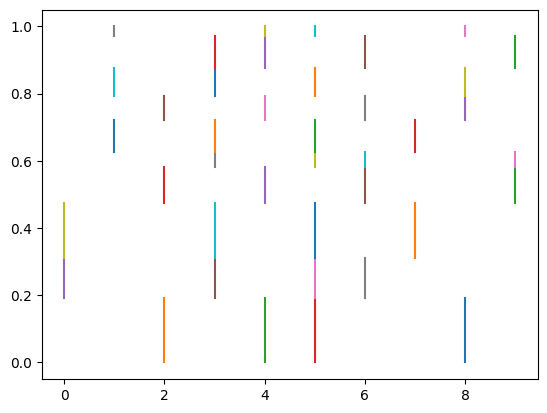

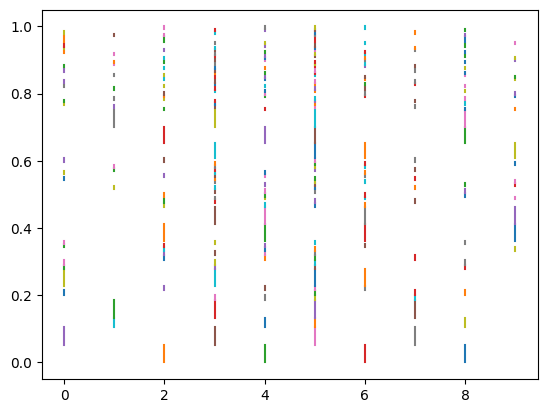

In [149]:
y = np.array(ro.r['y'])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
inclusions = np.array(ro.r['pik'])
shifted_x   = np.array(ro.r['z'])
threshold_x = ro.r['threshold_x']
threshold_y = ro.r['threshold_y']
inclusions = np.array(inclusions)
x = np.array(shifted_x)



max_open_set_size, switch_coefficient= 2000000,  .1
show_results = 0
random = 0
max_iterations = 10000000

for num_changes in [10]:
      for num_new_nodes in [10]:
            print(max_iterations, num_new_nodes, max_open_set_size, num_changes, switch_coefficient)
            AsDesign = Design(inclusions=inclusions)
            criterion = VarNHT(auxiliary_variable=y, inclusion_probability=inclusions)
            astar = AStar(initial_design=AsDesign,criteria=criterion, switch_coefficient=switch_coefficient, 
                          threshold=0)
            result = astar.run(
                    max_iterations=max_iterations,
                    num_new_nodes=num_changes,        # Or whatever value you want to test!
                    max_open_set_size=max_open_set_size,
                    num_changes=num_changes
                )
            print("Best criteria value:", astar.best_criteria_value)
            print("Iterations run:", result)
            astar.initial_design.show()

            astar.best_design.show()


# Package

In [ ]:
from geometric_sampling.search_algorithms.astar import AStarFast
from geometric_sampling.criteria.var_nht import VarNHT
from geometric_sampling.design import Design

import numpy as np

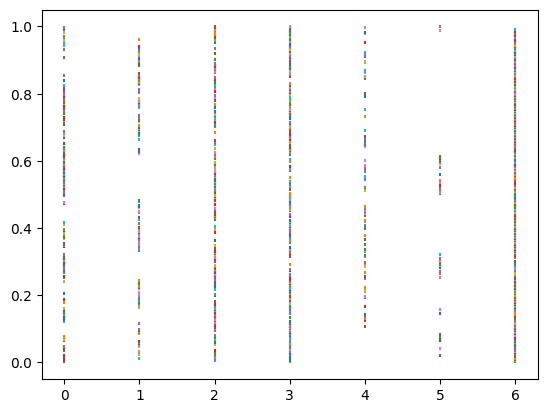

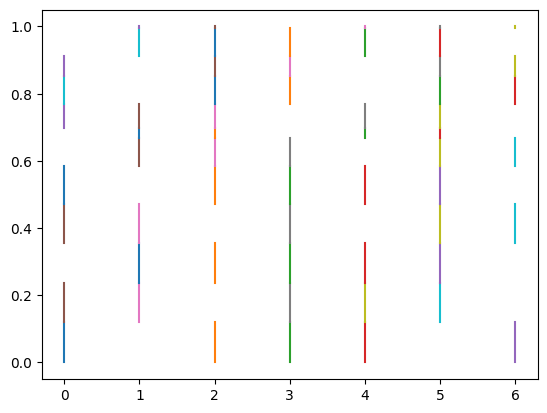

In [ ]:
N = 7
inclusion = np.random.rand(N)
inlcusion = np.array([.38, .3, .42, .65, .25, .1, .9])
D = Design(inlcusion)
for i in range(10000):
    D.iterate()
D.merge_identical()
D.show()
x = np.random.rand(N)
x = np.array([1,2,4,5,7,8,9])
a = AStarFast(VarNHT(x, inclusion))
a.run(max_iterations= 100000, num_new_nodes= 4, max_open_set_size= 1000, num_changes= 1)
a.best_design.show()
#for sample in a.best_design:
 #   print(sample)